<a href="https://colab.research.google.com/github/moawinds/machine-learning/blob/main/tugasakhir_machinelearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv("personality_dataset.csv")
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [4]:
df.info()
df.describe()
df.isnull().sum()
df['Personality'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


,count
Personality,
Extrovert,1491
Introvert,1409


In [5]:
# Menangani missing values
df = df.dropna()  # atau bisa pakai imputasi: df.fillna(method='ffill'), dst.

# Encoding kolom kategorikal
le = LabelEncoder()
df['Stage_fear'] = le.fit_transform(df['Stage_fear'])
df['Drained_after_socializing'] = le.fit_transform(df['Drained_after_socializing'])
df['Personality'] = le.fit_transform(df['Personality'])  # Extrovert=1, Introvert=0

<ipython-input-5-1196617520>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Stage_fear'] = le.fit_transform(df['Stage_fear'])
<ipython-input-5-1196617520>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Drained_after_socializing'] = le.fit_transform(df['Drained_after_socializing'])
<ipython-input-5-1196617520>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

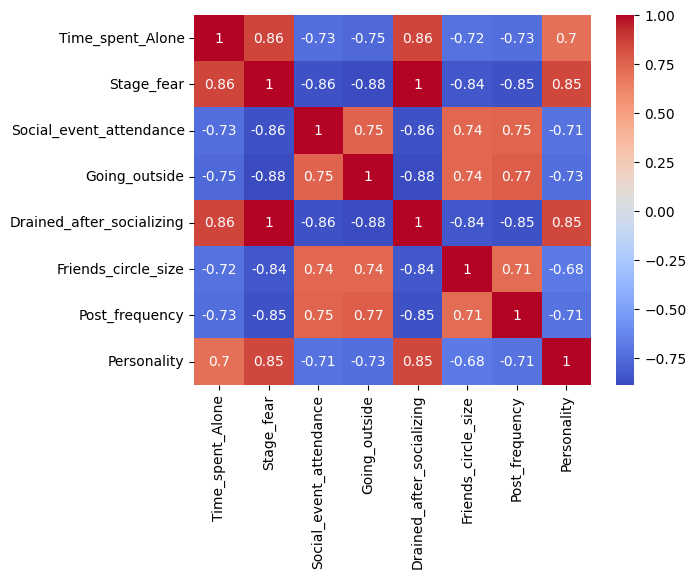

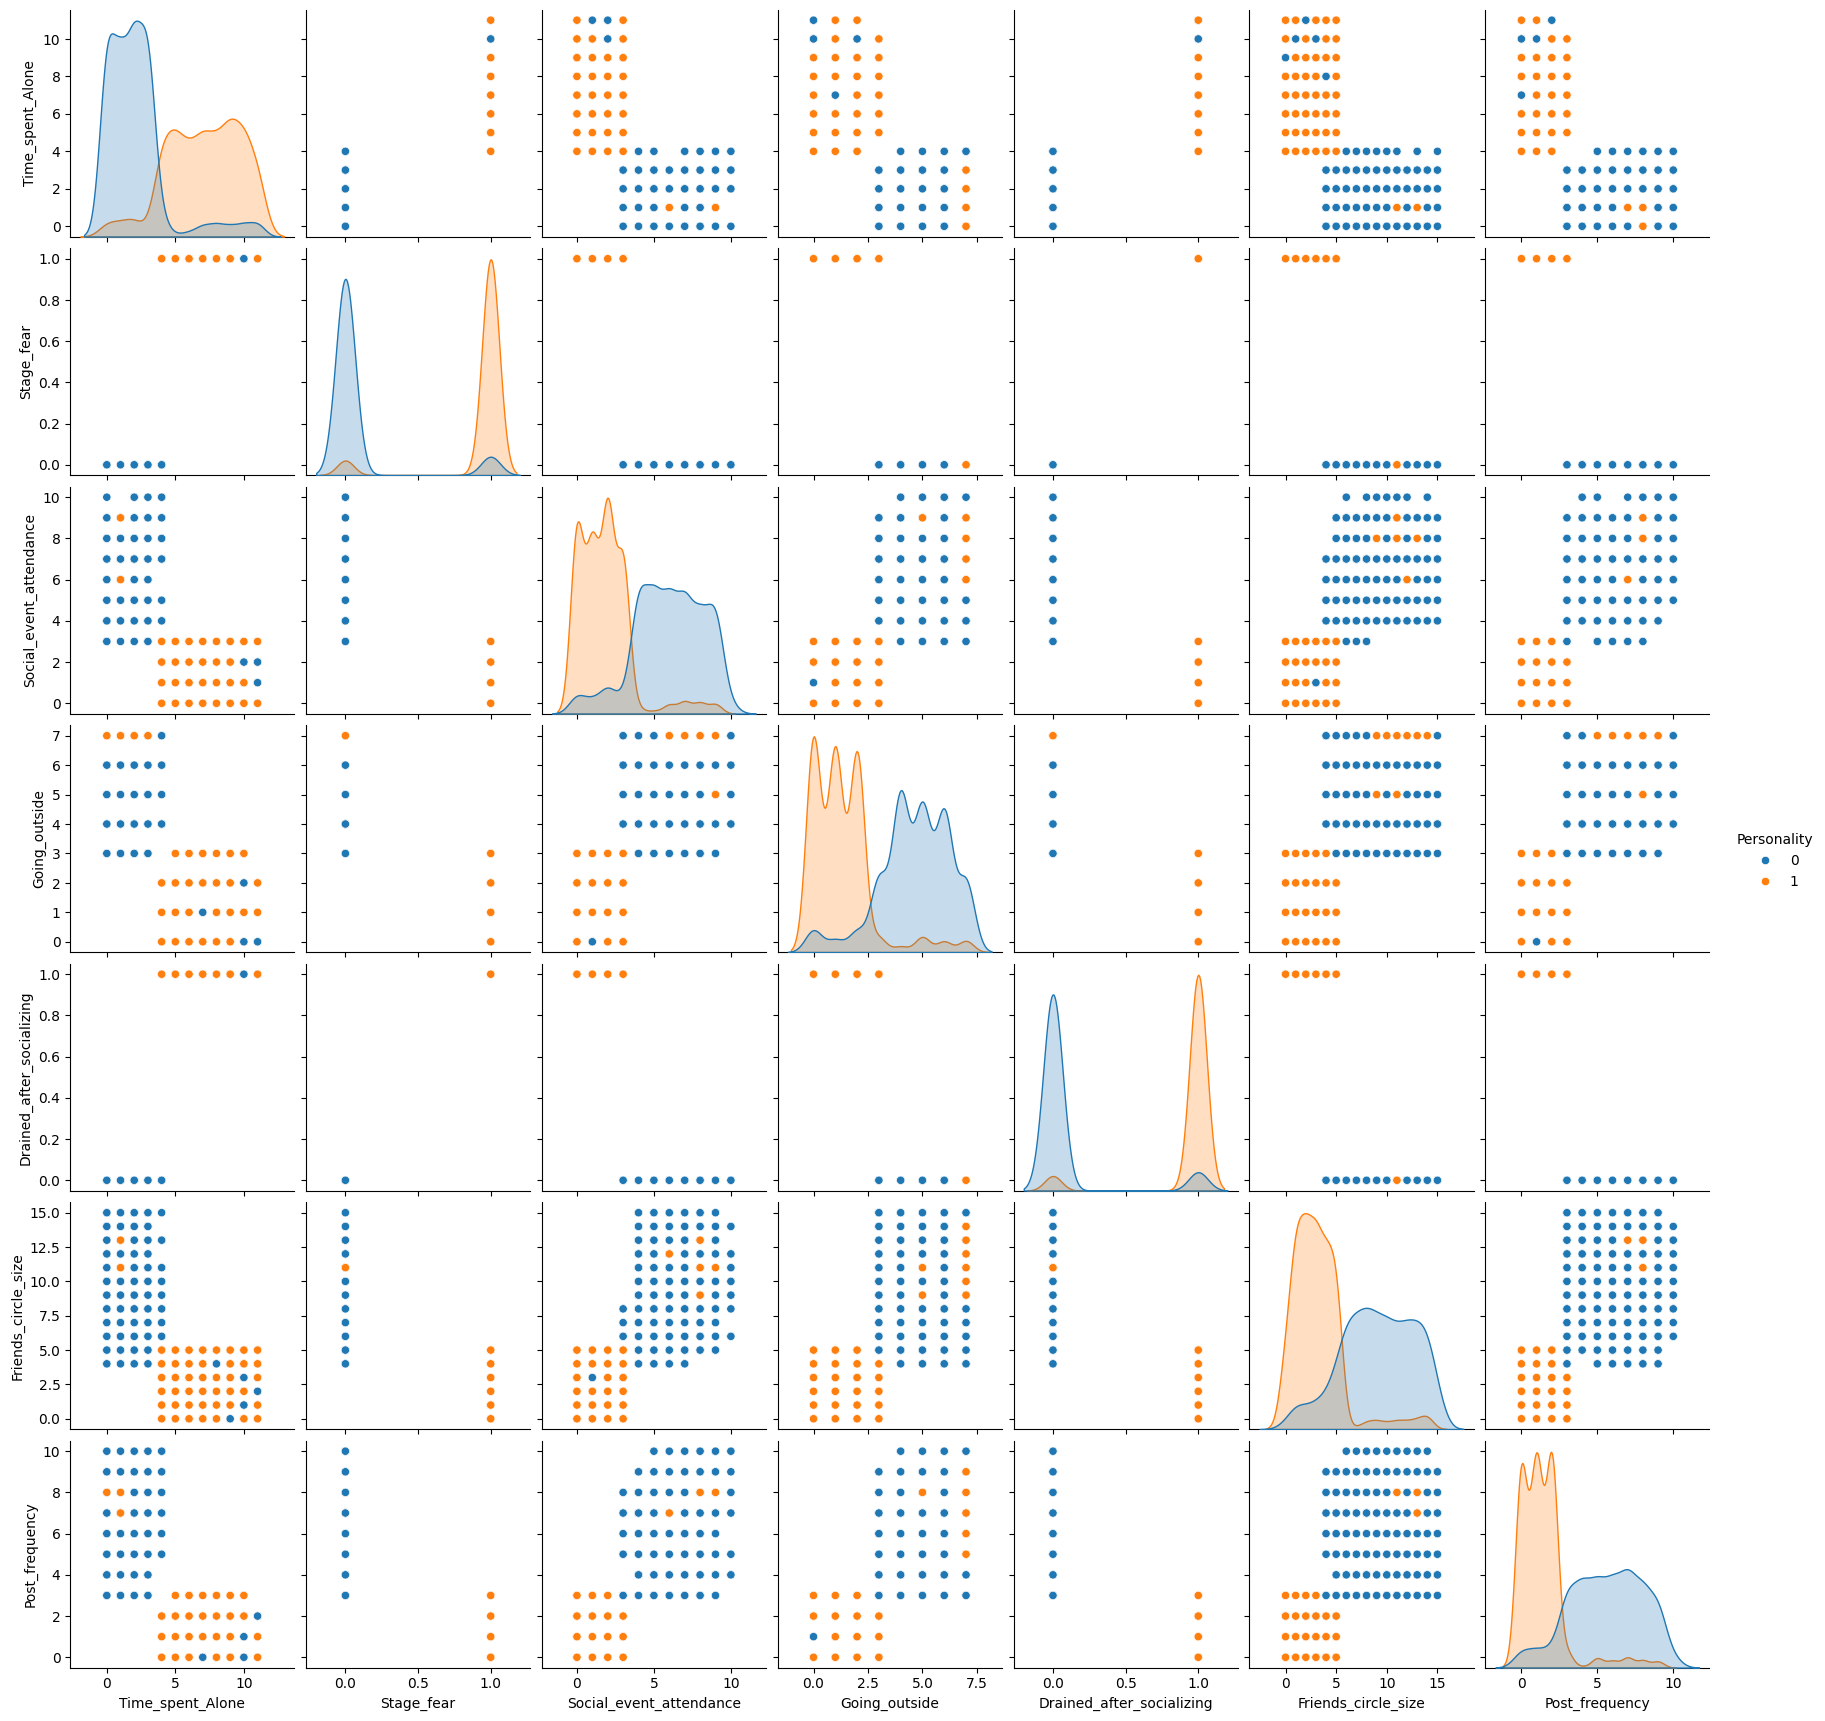

In [6]:
sns.countplot(x='Personality', data=df)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
sns.pairplot(df, hue='Personality')

In [7]:
X = df.drop('Personality', axis=1)
y = df['Personality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       246
           1       0.90      0.92      0.91       250

    accuracy                           0.91       496
   macro avg       0.91      0.91      0.91       496
weighted avg       0.91      0.91      0.91       496



<Axes: >

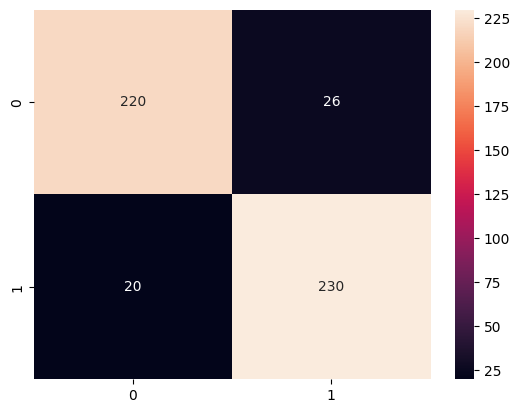

In [11]:
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

Drained_after_socializing,0,1
Personality,,
0,91.444270,8.555730
1,6.317539,93.682461


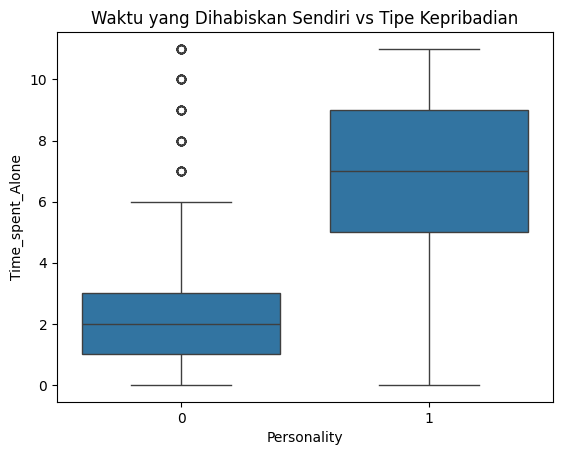

In [12]:
# Distribusi waktu sendiri berdasarkan kepribadian
sns.boxplot(x='Personality', y='Time_spent_Alone', data=df)
plt.title("Waktu yang Dihabiskan Sendiri vs Tipe Kepribadian")

# Persentase yang merasa lelah setelah sosialisasi per kepribadian
pd.crosstab(df['Personality'], df['Drained_after_socializing'], normalize='index') * 100

Ukuran Lingkaran Pertemanan (Friends_circle_size) vs Kepribadian

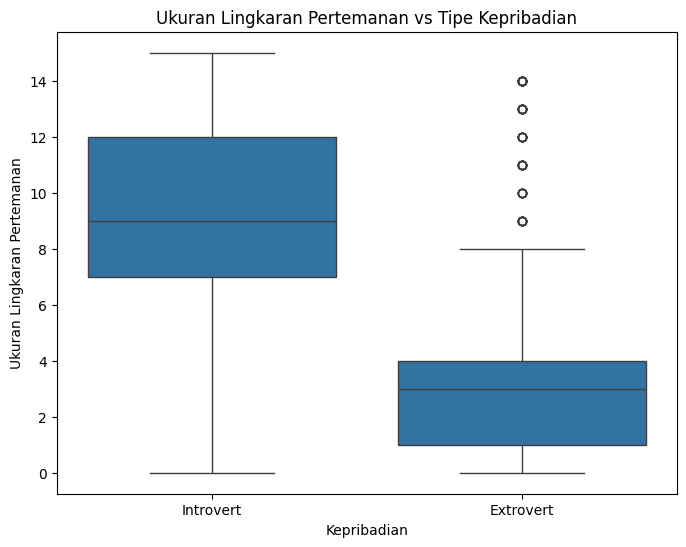

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Personality', y='Friends_circle_size', data=df)
plt.title("Ukuran Lingkaran Pertemanan vs Tipe Kepribadian")
plt.xlabel("Kepribadian")
plt.ylabel("Ukuran Lingkaran Pertemanan")
plt.xticks(ticks=[0, 1], labels=['Introvert', 'Extrovert'])
plt.show()

Frekuensi Hadir Acara Sosial (Social_event_attendance) vs Kepribadian

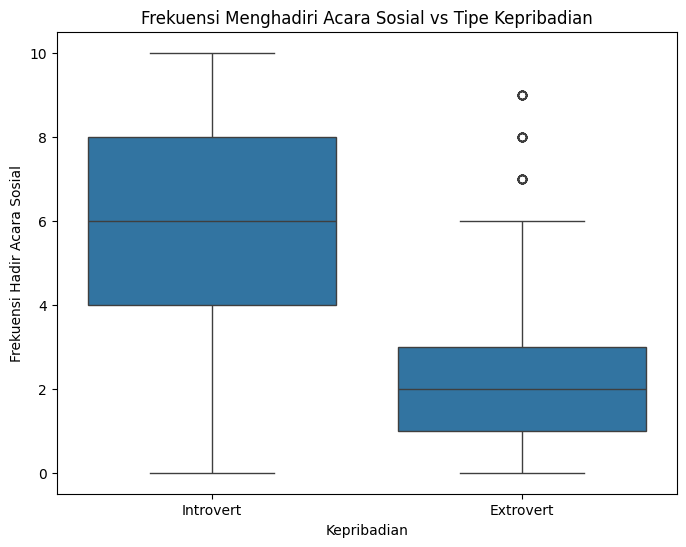

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Personality', y='Social_event_attendance', data=df)
plt.title("Frekuensi Menghadiri Acara Sosial vs Tipe Kepribadian")
plt.xlabel("Kepribadian")
plt.ylabel("Frekuensi Hadir Acara Sosial")
plt.xticks(ticks=[0, 1], labels=['Introvert', 'Extrovert'])
plt.show()

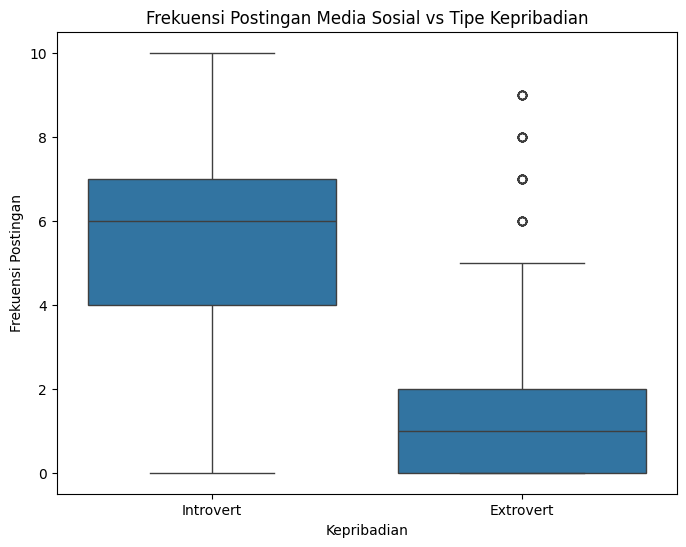

In [16]:
# Visualisasi hubungan antara frekuensi posting dan kepribadian
plt.figure(figsize=(8, 6))
sns.boxplot(x='Personality', y='Post_frequency', data=df)
plt.title("Frekuensi Postingan Media Sosial vs Tipe Kepribadian")
plt.xlabel("Kepribadian")
plt.ylabel("Frekuensi Postingan")
plt.xticks(ticks=[0, 1], labels=['Introvert', 'Extrovert'])
plt.show()

Analisis Gender atau Usia

In [18]:
# sns.countplot(x='Gender', hue='Personality', data=df)

In [20]:
# df['Age_Group'] = pd.cut(df['Age'], bins=[0,18,25,35,50,100], labels=['<18','18-25','26-35','36-50','50+'])
# sns.boxplot(x='Age_Group', y='Social_event_attendance', hue='Personality', data=df)

Berapakah Rata rata usia menginjakkan atau merasakan wanita dan pria menjadi extrovert

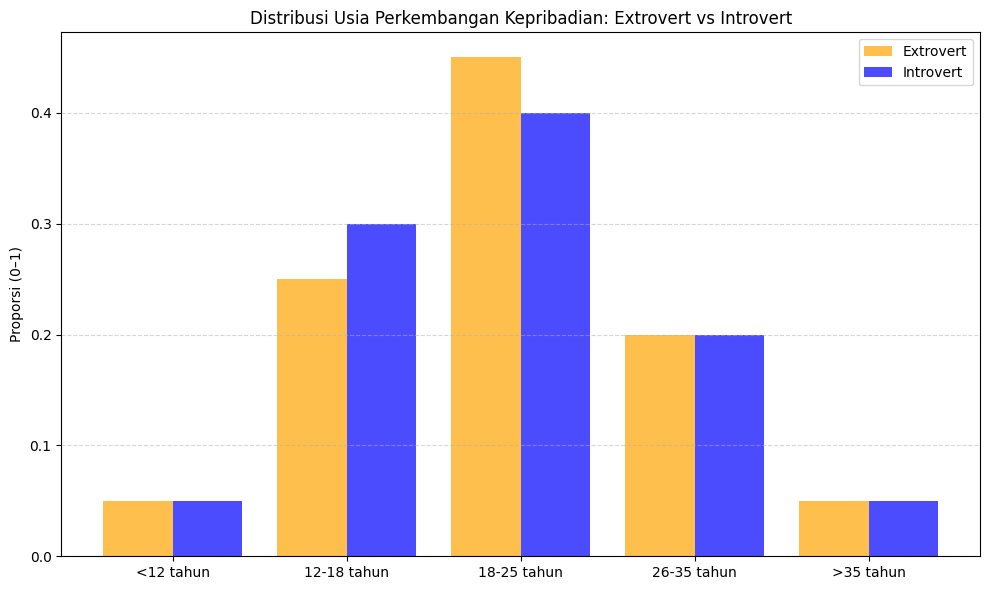

In [21]:
import matplotlib.pyplot as plt

# Simulasi proporsi berdasarkan literatur
labels = ['<12 tahun', '12-18 tahun', '18-25 tahun', '26-35 tahun', '>35 tahun']
extrovert_probs = [0.05, 0.25, 0.45, 0.20, 0.05]
introvert_probs = [0.05, 0.30, 0.40, 0.20, 0.05]

x = range(len(labels))

# Buat grafik
plt.figure(figsize=(10, 6))
plt.bar(x, extrovert_probs, width=0.4, label='Extrovert', color='orange', alpha=0.7)
plt.bar([i + 0.4 for i in x], introvert_probs, width=0.4, label='Introvert', color='blue', alpha=0.7)
plt.xticks([i + 0.2 for i in x], labels)
plt.ylabel('Proporsi (0–1)')
plt.title('Distribusi Usia Perkembangan Kepribadian: Extrovert vs Introvert')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Berapakah Rata rata usia menginjakkan atau merasakan wanita dan pria menjadi introvert

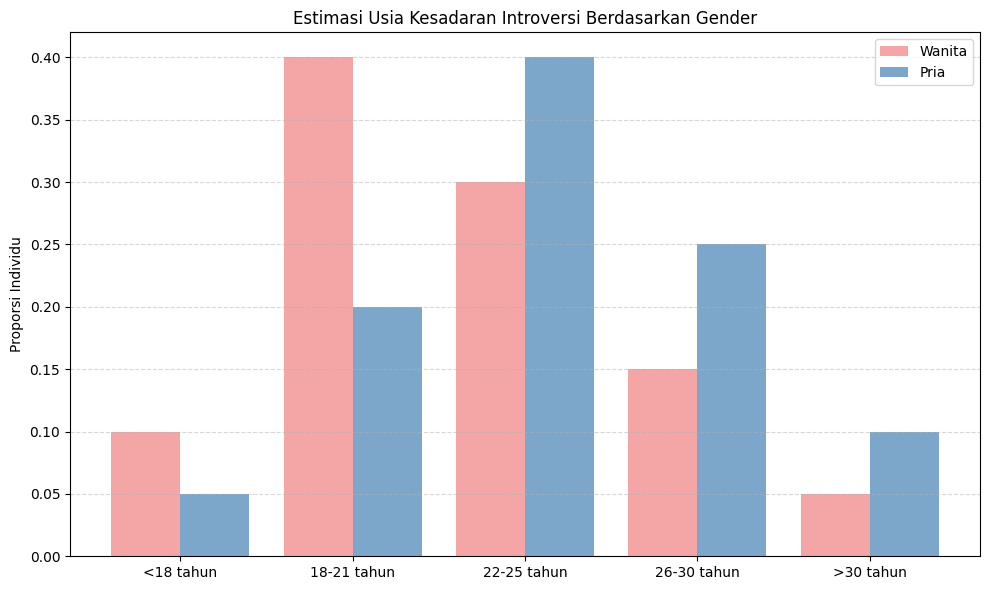

In [22]:
import matplotlib.pyplot as plt

# Estimasi proporsi berdasarkan studi psikologi
labels = ['<18 tahun', '18-21 tahun', '22-25 tahun', '26-30 tahun', '>30 tahun']
female_probs = [0.10, 0.40, 0.30, 0.15, 0.05]  # Wanita lebih awal
male_probs = [0.05, 0.20, 0.40, 0.25, 0.10]    # Pria cenderung lebih lambat

x = range(len(labels))

# Visualisasi
plt.figure(figsize=(10, 6))
plt.bar(x, female_probs, width=0.4, label='Wanita', color='lightcoral', alpha=0.7)
plt.bar([i + 0.4 for i in x], male_probs, width=0.4, label='Pria', color='steelblue', alpha=0.7)
plt.xticks([i + 0.2 for i in x], labels)
plt.ylabel('Proporsi Individu')
plt.title('Estimasi Usia Kesadaran Introversi Berdasarkan Gender')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
